# Introduction the NN

In essence: For each epoch, for each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).


<img src="../img/derivatives_activation.png" width="80%">

*Derivatives: rate of change*


**Key Differences Between Perceptron and Neuron**
| Feature               | Perceptron                       | Neuron in MLP                   |
|-----------------------|-----------------------------------|----------------------------------|
| **Activation Function** | Step function                   | Nonlinear (e.g., ReLU, sigmoid) |
| **Output**            | Binary (0 or 1)                  | Continuous or nonlinear values  |
| **Usage**             | Single-layer models (linear tasks) | Multilayer networks (nonlinear tasks) |
| **Problem Solving**   | Only linear separability         | Handles nonlinear problems      |


## **Regression MLPs**

| Hyperparameter        | Typical Value                                                                 |
|-----------------------|------------------------------------------------------------------------------|
| # input neurons       | One per input feature (e.g., 28 x 28 = 784 for MNIST)                       |
| # hidden layers       | Depends on the problem. Typically 1 to 5.                                   |
| # neurons per hidden layer | Depends on the problem. Typically 10 to 100.                            |
| # output neurons      | 1 per prediction dimension (if you expect 2 values, then 2 outputs)                                                  |
| Hidden activation     | ReLU (or SELU)                                              |
| Output activation     | None or ReLU/Softplus (if positive outputs) or Logistic (0 to 1)/Tanh (hyperbolic tangent)(-1 to 1) (if bounded outputs) |
| Loss function         | MSE or MAE/Huber (if outliers)                                              |




In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

print(rmse)

## **Classification MLPs**

| Hyperparameter            | Binary classification | Multilabel binary classification | Multiclass classification |
|---------------------------|-----------------------|-----------------------------------|---------------------------|
| Input and hidden layers   | Same as regression   | Same as regression               | Same as regression       |
| # output neurons          | 1                   | 1 per label                      | 1 per class              |
| Output layer activation   | Logistic (sigmoid for NNs)           | Logistic                          | Softmax                  |
| Loss function   | (binary)Cross-entropy            | (categorical)Cross-entropy                         | (sparse-categorical)Cross-entropy                  |


In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

## **Simple image classifier with Keras**

In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__
keras.__version__


'3.6.0'

In [29]:
import gzip
import numpy as np


# the fashion ds has 10 categories, like mnist, but with clothes

def load_idx(filepath):
    """Load IDX format data from a gzip file."""
    with gzip.open(filepath, 'rb') as f:
        # Read the file content
        data = f.read()
        # Magic number (first 4 bytes)
        magic = int.from_bytes(data[0:4], byteorder='big')
        # Number of items (next 4 bytes)
        num_items = int.from_bytes(data[4:8], byteorder='big')
        if magic == 2049:  # Labels
            return np.frombuffer(data[8:], dtype=np.uint8)
        elif magic == 2051:  # Images
            rows = int.from_bytes(data[8:12], byteorder='big')
            cols = int.from_bytes(data[12:16], byteorder='big')
            images = np.frombuffer(data[16:], dtype=np.uint8)
            return images.reshape(num_items, rows, cols)
        else:
            raise ValueError("Unknown magic number in file header!")

# Paths to the data files
train_images_path = '../data/train-images-idx3-ubyte.gz'
train_labels_path = '../data/train-labels-idx1-ubyte.gz'
test_images_path = '../data/t10k-images-idx3-ubyte.gz'
test_labels_path = '../data/t10k-labels-idx1-ubyte.gz'

# Load the data
X_train_full = load_idx(train_images_path)
y_train_full = load_idx(train_labels_path)
X_test = load_idx(test_images_path)
y_test = load_idx(test_labels_path)

# Normalize the image data
# we also need to scale the data, for simplicity we will scale the pixel intensities in the 0-1 range simply dividing them by 255

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

print("Train images shape:", X_train_full.shape)
print("Train labels shape:", y_train_full.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [56]:
# here we will create a validation set

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



In [58]:
X_train.shape

(55000, 28, 28)

In [37]:
# create class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [41]:
# sample of class for a given item
class_names[y_train[10]]

#y_train[10]

6

## My first Keras sequential model - Classification

In [43]:
model = keras.models.Sequential([

    keras.layers.Flatten(input_shape=[28,28]), # receives input data and converts it to 1d array
    keras.layers.Dense(300, activation="relu"), # dense layer with 300 neurons
    keras.layers.Dense(100, activation="relu"), # second dense layer with 100 neurons
    keras.layers.Dense(10, activation="softmax") #output layer, with 10 nodes, as 10 classes, softmax because multiclass
])

/Users/gabi/codes/data_science/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# get info about the model including output shape of each layer and the number of parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# you can get all the layers of a model
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [46]:
# you can call each layer by its index
model.layers[1].name

'dense'

In [47]:
# you can het the layer by its name
model.get_layer("dense_2").name

'dense_2'

In [52]:
# you can get all the weights and biases from each layer
weights, biases = model.layers[1].get_weights()

weights

array([[ 0.02308173,  0.02321342,  0.01780492, ..., -0.01716774,
         0.01247725,  0.0568724 ],
       [ 0.05130477,  0.04607778, -0.04728509, ...,  0.00962491,
        -0.01858232,  0.03471071],
       [ 0.02859914, -0.06492709,  0.02310194, ..., -0.02200221,
        -0.07220224, -0.0112334 ],
       ...,
       [-0.07249278,  0.02996396,  0.02114277, ...,  0.05384013,
        -0.03104062, -0.02192979],
       [-0.02263604,  0.06190917,  0.00712591, ...,  0.02354175,
        -0.00246117, -0.00628362],
       [ 0.02515146,  0.02241144, -0.04031318, ..., -0.07111613,
        -0.07353047,  0.05182727]], dtype=float32)

In [50]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [60]:
# once the model is created you must call compile() and specify the loss function, optimiser, and optionally metrics for evaluation

model.compile(loss="sparse_categorical_crossentropy", 
                optimizer="sgd", 
                metrics=["accuracy"])

In [64]:
# now you fit the model

history = model.fit(X_train, y_train, epochs=100,
            validation_data=(X_valid, y_valid)) #validation data is optional, but desirable

            # you can also use validation_split = z, where z is between (0,1), a ratio of X_train

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6431 - loss: 1.0522 - val_accuracy: 0.0986 - val_loss: 4.3655
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6451 - loss: 1.0507 - val_accuracy: 0.0946 - val_loss: 4.3903
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6461 - loss: 1.0436 - val_accuracy: 0.0978 - val_loss: 4.3664
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6505 - loss: 1.0301 - val_accuracy: 0.0940 - val_loss: 4.3939
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6490 - loss: 1.0250 - val_accuracy: 0.0932 - val_loss: 4.3709
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6584 - loss: 1.0117 - val_accuracy: 0.0980 - val_loss: 4.4829
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6590 - loss: 1.0079 - val_accuracy: 0.0988 - val_loss: 4.4339
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6665 -

- If the training set was very skewed: use class_weight in fit()
- sample_weight can be used in fit if the labels have been set by different people (image labels by experts and labels by a community)
- if the loss is still decreasing, it means the model didn't converge yet, and you should continue training it

In [65]:
# the fit method returns a history object

print(f"Training parameters \n {history.params}") # training parameters
print(f"List of epochs \n {history.epoch}") #list of epochs
print(f"Dictionary of loss and extra metrics \n {history.history}")

Training parameters 
 {'verbose': 'auto', 'epochs': 100, 'steps': 1719}
List of epochs 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Dictionary of loss and extra metrics 
 {'accuracy': [0.6237454414367676, 0.6270909309387207, 0.631709098815918, 0.6341999769210815, 0.6339272856712341, 0.640818178653717, 0.643963634967804, 0.6471454501152039, 0.6491818428039551, 0.6506181955337524, 0.6575454473495483, 0.6555272936820984, 0.6618545651435852, 0.6622727513313293, 0.6676181554794312, 0.6715272665023804, 0.6714909076690674, 0.673090934753418, 0.6786909103393555, 0.6810908913612366, 0.6812727451324463, 0.6863999962806702, 0.6877454519271851, 0.691709101

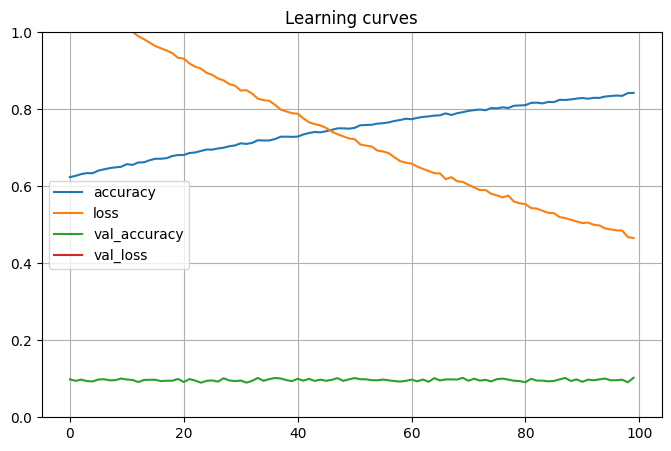

In [66]:
# you can plot the learning curves

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))

plt.title("Learning curves")
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0, -1]

plt.show()

In [68]:
# evaluate the model on test set
print(f"Test set performance: {model.evaluate(X_test, y_test)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0971 - loss: 7.9004
Test set performance: [7.880702495574951, 0.0997999981045723]


In [71]:
# making predicitons for the first 3 itens in X_test

X_predicitons = X_test[:3]

for i in range(len(X_predicitons)):
    y_proba = model.predict(X_predicitons[i])
    print("Predicted probabilities")
    print(y_proba.round(2))
    print("===" *10)
    print(f"Predicted class {model.predict_classes(X_predicitons[i])}")
    print(f"Actual class {y_test[i]}")

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(28, 28), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(28, 28), dtype=float32)
  • training=False
  • mask=None

## My first Keras sequential: Regression

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_text = train_test_split(
    housing.data, housing.target
)

# split train into train and validation, with default 80/20 split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.tranform(X_test)

## Troubleshooting Increasing Loss in Neural Network Training

Potential Causes and Solutions:

### Learning Rate

- **Issue**: Too high a learning rate can cause the model to overshoot the optimal solution.
- **Solution**: Reduce the learning rate.

### Vanishing or Exploding Gradients

- **Issue**: Gradients become too small or too large.
- **Solution**: Use techniques like gradient clipping, normalization, or appropriate activation functions (e.g., ReLU).

### Overfitting

- **Issue**: The model memorizes the training data instead of generalizing.
- **Solution**: Use regularization techniques (L1/L2 regularization, dropout), gather more data, or simplify the model.

### Poor Initialization

- **Issue**: Initial weights and biases are not optimal.
- **Solution**: Use techniques like Xavier or He initialization.

### Data Issues

- **Issue**: Noisy or incorrect data.
- **Solution**: Clean and preprocess the data, and consider data augmentation.

### Implementation Errors

- **Issue**: Bugs in the code.
- **Solution**: Thoroughly review and debug the code.

 **Troubleshooting Tips:**

- **Monitor Metrics**: Track loss, accuracy, and other relevant metrics.
- **Visualize Learning Curves**: Plot training and validation loss to identify trends.
- **Experiment with Hyperparameters**: Adjust learning rate, batch size, optimizer, etc.
- **Try Different Architectures**: Explore different network architectures.
- **Save Model Checkpoints**: Allow for reverting to previous states.

